# Stage debut de projet

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from difflib import SequenceMatcher
import string

## Data import

In [2]:
# Lecture du fichier JSONL avec pandas
df = pd.read_json("train_xl.jsonl", lines=True)

df

,qID,sentence,option1,option2,answer
0,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-2,Ian volunteered to eat Dennis's menudo after a...,Ian,Dennis,2
1,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-1,Ian volunteered to eat Dennis's menudo after a...,Ian,Dennis,1
2,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-1,"He never comes to my home, but I always go to ...",home,house,1
3,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-2,"He never comes to my home, but I always go to ...",home,house,2
4,3D5G8J4N5CI2K40F4RZLF9OG2CKVTH-2,"Kyle doesn't wear leg warmers to bed, while Lo...",Kyle,Logan,2
...,...,...,...,...,...
40393,3PKJ68EHDNUOUBAJ3ASD64MQ8GSJHJ-1,I felt lucky because when the fish slipped of ...,pole,net,1
40394,3W1K7D6QSDVJX2B852X30LVRM6WZBL-1,Dennis took months to write back to Kenneth's ...,Dennis,Kenneth,1
40395,3W1K7D6QSDVJX2B852X30LVRM6WZBL-2,Dennis took months to write back to Kenneth's ...,Dennis,Kenneth,2
40396,3BO3NEOQM2VSJ2H6ZK9L5F8V75BAIT-1,My hair looked better in a braid than a ponyta...,braid,ponytail,1


## Mots frequents dans les choix

In [3]:
# Fonction pour séparer et compter noms propres et noms communs
def separer_mots(colonne):
    mots = colonne.str.split().explode()  # Séparation des mots
    noms_propres = [mot for mot in mots if mot.istitle()]
    noms_communs = [mot for mot in mots if not mot.istitle()]
    compteur_propres = Counter(noms_propres)
    compteur_communs = Counter(noms_communs)
    return compteur_propres.most_common(20), compteur_communs.most_common(20)

# Top 20 pour option1
top_propres_option1, top_communs_option1 = separer_mots(df["option1"])
print("Top 20 noms propres dans option1 :", top_propres_option1)
print("Top 20 noms communs dans option1 :", top_communs_option1)
print()

# Top 20 pour option2
top_propres_option2, top_communs_option2 = separer_mots(df["option2"])
print("Top 20 noms propres dans option2 :", top_propres_option2)
print("Top 20 noms communs dans option2 :", top_communs_option2)
print()

# Top 20 pour option1 et option2 combinés
top_propres_combined, top_communs_combined = separer_mots(df["option1"] + " " + df["option2"])
print("Top 20 noms propres combinés :", top_propres_combined)
print("Top 20 noms communs combinés :", top_communs_combined)
print()

Top 20 noms propres dans option1 : [('Elena', 484), ('Jessica', 456), ('Emily', 452), ('Lindsey', 450), ('Victoria', 446), ('Christine', 440), ('Kayla', 438), ('Katrina', 432), ('Mary', 430), ('Patricia', 428), ('Rachel', 428), ('Tanya', 428), ('Cynthia', 428), ('Erin', 424), ('Angela', 424), ('Laura', 422), ('Megan', 414), ('Betty', 412), ('Sarah', 412), ('Jennifer', 410)]
Top 20 noms communs dans option1 : [('car', 174), ('house', 128), ('book', 116), ('bag', 106), ('box', 102), ('bowl', 96), ('ball', 94), ('water', 92), ('bottle', 92), ('table', 88), ('chair', 84), ('food', 84), ('carpet', 84), ('wood', 80), ('school', 80), ('shirt', 76), ('tree', 76), ('floor', 70), ('pot', 66), ('computer', 66)]

Top 20 noms propres dans option2 : [('Christine', 468), ('Sarah', 446), ('Kayla', 446), ('Rachel', 446), ('Samantha', 442), ('Victoria', 440), ('Monica', 438), ('Jennifer', 438), ('Jessica', 434), ('Lindsey', 434), ('Felicia', 432), ('Megan', 428), ('Erin', 424), ('Katrina', 424), ('Mary'

pas très lisible, on va faire des graphiques

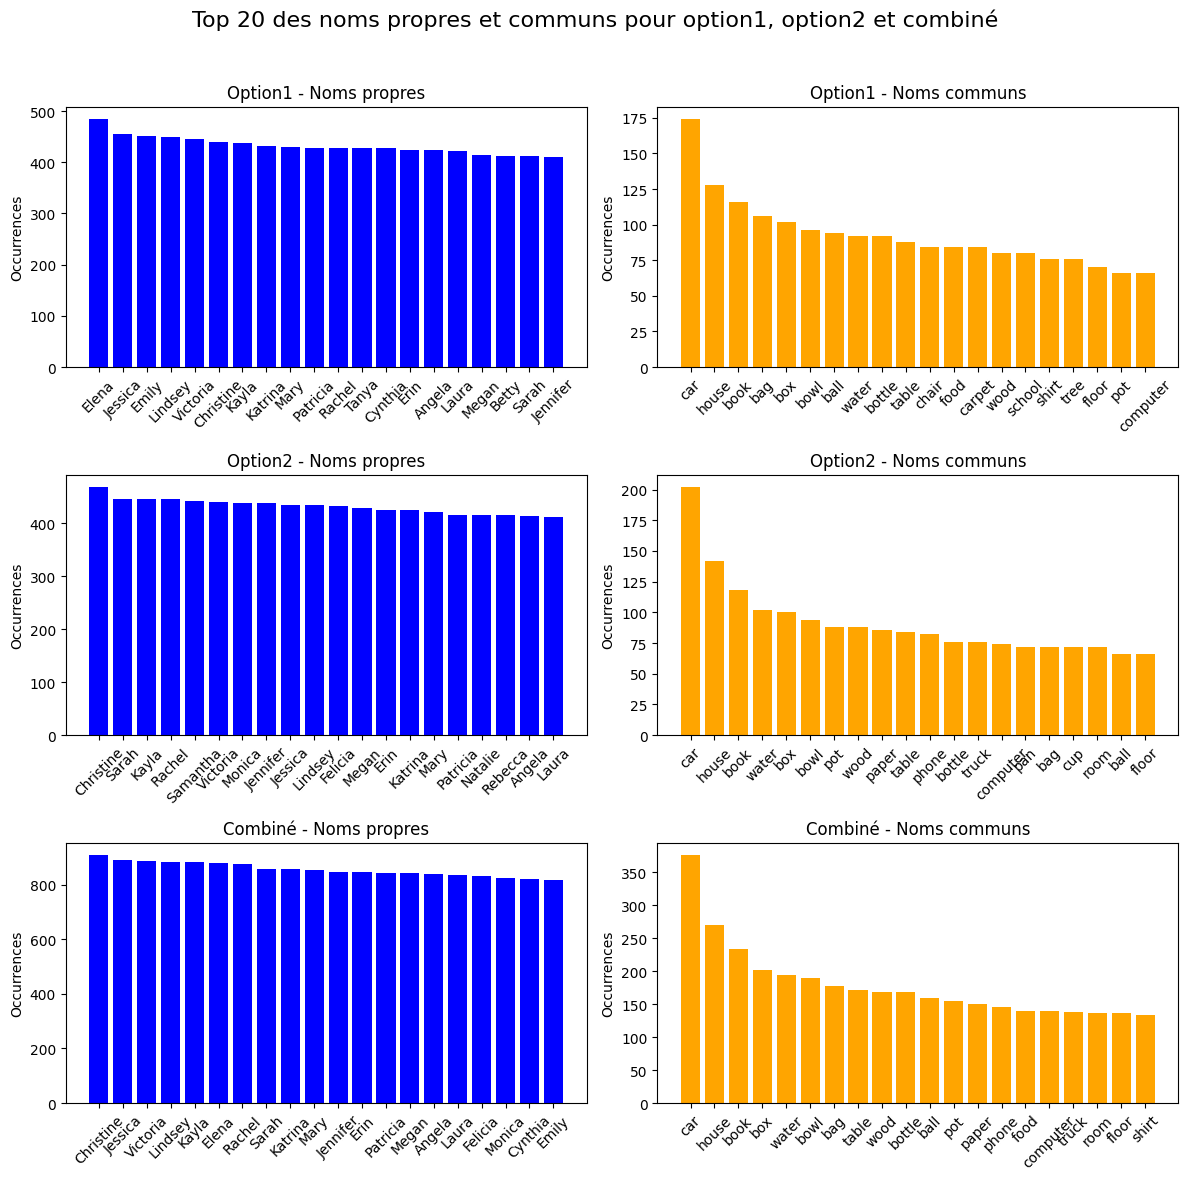

In [4]:
# Fonction pour extraire les labels et les valeurs
def extract_labels_and_values(data):
    labels, values = zip(*data) if data else ([], [])
    return labels, values

# Création des subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle("Top 20 des noms propres et communs pour option1, option2 et combiné", fontsize=16)

# Option1 - Noms propres
labels, values = extract_labels_and_values(top_propres_option1)
axs[0, 0].bar(labels, values, color="blue")
axs[0, 0].set_title("Option1 - Noms propres")
axs[0, 0].set_ylabel("Occurrences")
axs[0, 0].tick_params(axis='x', rotation=45)

# Option1 - Noms communs
labels, values = extract_labels_and_values(top_communs_option1)
axs[0, 1].bar(labels, values, color="orange")
axs[0, 1].set_title("Option1 - Noms communs")
axs[0, 1].set_ylabel("Occurrences")
axs[0, 1].tick_params(axis='x', rotation=45)

# Option2 - Noms propres
labels, values = extract_labels_and_values(top_propres_option2)
axs[1, 0].bar(labels, values, color="blue")
axs[1, 0].set_title("Option2 - Noms propres")
axs[1, 0].set_ylabel("Occurrences")
axs[1, 0].tick_params(axis='x', rotation=45)

# Option2 - Noms communs
labels, values = extract_labels_and_values(top_communs_option2)
axs[1, 1].bar(labels, values, color="orange")
axs[1, 1].set_title("Option2 - Noms communs")
axs[1, 1].set_ylabel("Occurrences")
axs[1, 1].tick_params(axis='x', rotation=45)

# Combiné - Noms propres
labels, values = extract_labels_and_values(top_propres_combined)
axs[2, 0].bar(labels, values, color="blue")
axs[2, 0].set_title("Combiné - Noms propres")
axs[2, 0].set_ylabel("Occurrences")
axs[2, 0].tick_params(axis='x', rotation=45)

# Combiné - Noms communs
labels, values = extract_labels_and_values(top_communs_combined)
axs[2, 1].bar(labels, values, color="orange")
axs[2, 1].set_title("Combiné - Noms communs")
axs[2, 1].set_ylabel("Occurrences")
axs[2, 1].tick_params(axis='x', rotation=45)

# Ajustement des espacements
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Parties de phrases changées

création du dictionnaire qui répertorie les changements dans les phrases.

In [5]:
# Identifier les paires basées sur qID
df["base_id"] = df["qID"].str[:-2]  # Retirer le suffixe (-1 ou -2)
grouped = df.groupby("base_id")

# Dictionnaire pour stocker les différences
differences = {}

# Fonction pour supprimer la ponctuation d'une chaîne
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Parcourir les groupes pour détecter les paires
for base_id, group in grouped:
    if len(group) == 2:  # S'assurer qu'il y a une paire
        sentence1, sentence2 = group["sentence"].values
        
        # Supprimer la ponctuation des phrases
        sentence1 = remove_punctuation(sentence1)
        sentence2 = remove_punctuation(sentence2)
        
        # Comparer les phrases par mots (en utilisant des listes de mots)
        mots1 = sentence1.split()
        mots2 = sentence2.split()
        
        # Identifier les différences avec SequenceMatcher
        matcher = SequenceMatcher(None, mots1, mots2)
        differents = []
        
        for tag, i1, i2, j1, j2 in matcher.get_opcodes():
            if tag != "equal":  # On s'intéresse uniquement aux différences
                # Ajouter les mots différents des deux phrases
                diff1 = " ".join(mots1[i1:i2])
                diff2 = " ".join(mots2[j1:j2])
                if diff1:
                    differents.append(diff1)
                if diff2:
                    differents.append(diff2)
        
        # Stocker les différences pour cet identifiant
        differences[base_id] = differents

top 20 des changements

In [6]:
# Rassembler toutes les paires dans une seule liste
toutes_les_paires = [
    frozenset((liste[0], liste[1])) for liste in differences.values() if len(liste) == 2
]

# Compter les occurrences des paires
compteur_paires = Counter(toutes_les_paires)

# Obtenir le top 20 des paires les plus fréquentes
top_20_paires = compteur_paires.most_common(20)

# Conversion en DataFrame
df_top_paires = pd.DataFrame(
    [(tuple(paire), occurrences) for paire, occurrences in top_20_paires],
    columns=['Paire', 'Occurrences']
)

# Afficher les résultats
df_top_paires


,Paire,Occurrences
0,"(less, more)",640
1,"(large, small)",335
2,"(small, big)",248
3,"(full, empty)",200
4,"(strong, weak)",197
5,"(always, never)",168
6,"(worse, better)",160
7,"(although, because)",151
8,"(loved, hated)",135
9,"(but, because)",125
